In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/habermans-survival-data-set/haberman.csv


In [28]:
rda = pd.read_csv("/kaggle/input/habermans-survival-data-set/haberman.csv", header=None, names=['age', 'year', 'lymph_node_count', 'survival_status_after_5_years'])

In [29]:
rda.head()

,age,year,lymph_node_count,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [30]:
rda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            306 non-null    int64
 1   year                           306 non-null    int64
 2   lymph_node_count               306 non-null    int64
 3   survival_status_after_5_years  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


No NaN or null cells.

Change survival after 5 years to Yes or No

In [31]:
list(rda['survival_status_after_5_years'].unique())

[1, 2]

In [32]:
rda['survival_status_after_5_years'] = rda['survival_status_after_5_years'].map({1:"yes", 2:"no"})
rda['survival_status_after_5_years'] = rda['survival_status_after_5_years'].astype('category')
rda.head()

,age,year,lymph_node_count,survival_status_after_5_years
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [33]:
rda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            306 non-null    int64   
 1   year                           306 non-null    int64   
 2   lymph_node_count               306 non-null    int64   
 3   survival_status_after_5_years  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [34]:
rda.describe()

,age,year,lymph_node_count
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [41]:
print("Total rows: " + str(rda.shape[0]))
print("Total columns: " + str(rda.shape[1]))
print("Columns: " + ", ".join(rda.columns))

print(rda.iloc[:,-1].value_counts())
print(rda.iloc[:,-1].value_counts(normalize = True))

Total rows: 306
Total columns: 4
Columns: age, year, lymph_node_count, survival_status_after_5_years
yes    225
no      81
Name: survival_status_after_5_years, dtype: int64
yes    0.735294
no     0.264706
Name: survival_status_after_5_years, dtype: float64


**Visualizations**

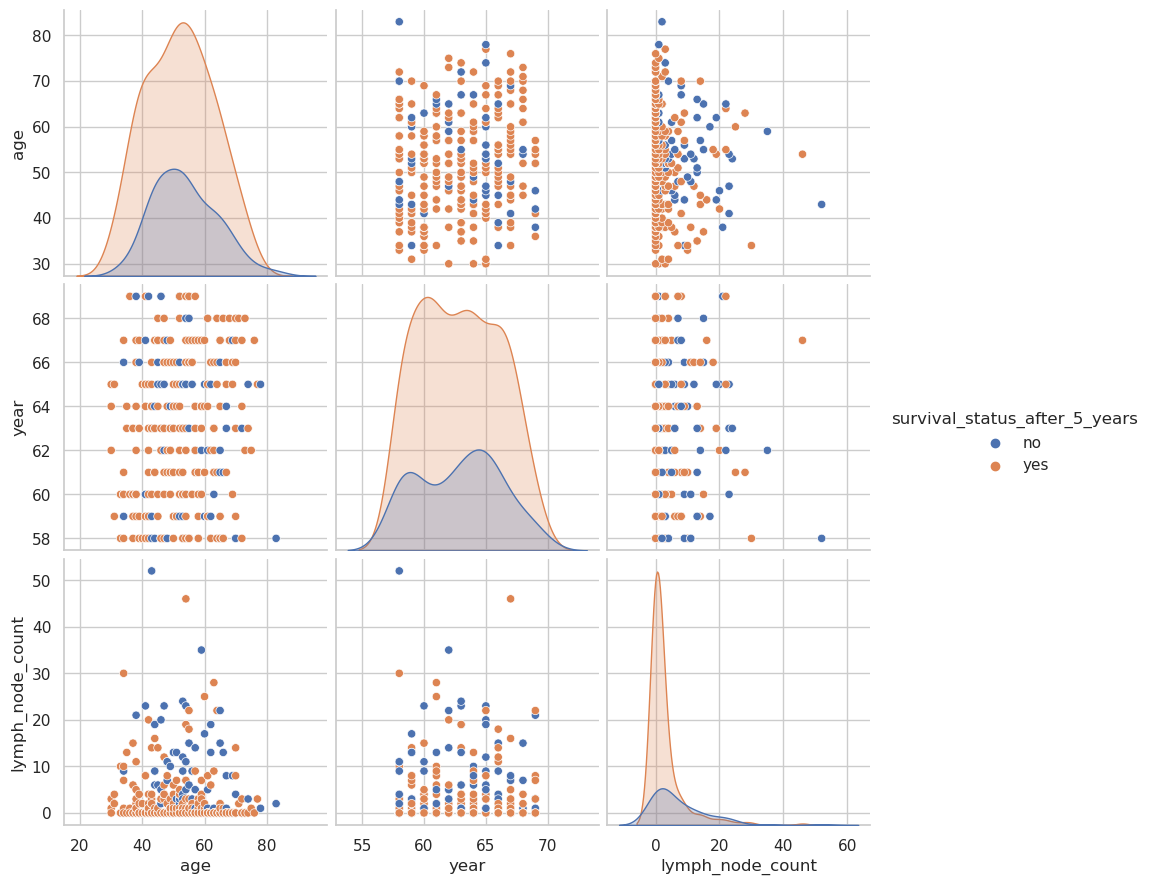

In [43]:
sns.set_style('whitegrid')
sns.pairplot(rda, hue='survival_status_after_5_years', vars=['age', 'year', 'lymph_node_count'], height=3)
plt.show()

Using the pairplot, I try to find the correlation between the survivability after 5 years and the other columns.
There seems to be a higher correlation between the number of lymph nodes and age/year of treatment

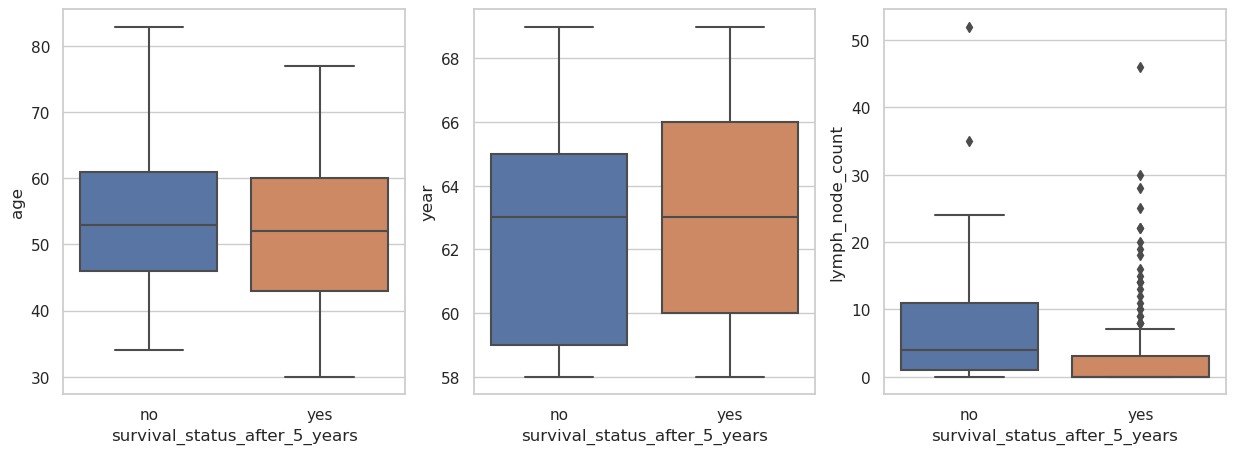

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(rda.columns)[:-1]):
    sns.boxplot( x='survival_status_after_5_years', y=feature, data=rda, ax=axes[idx])
plt.show()  

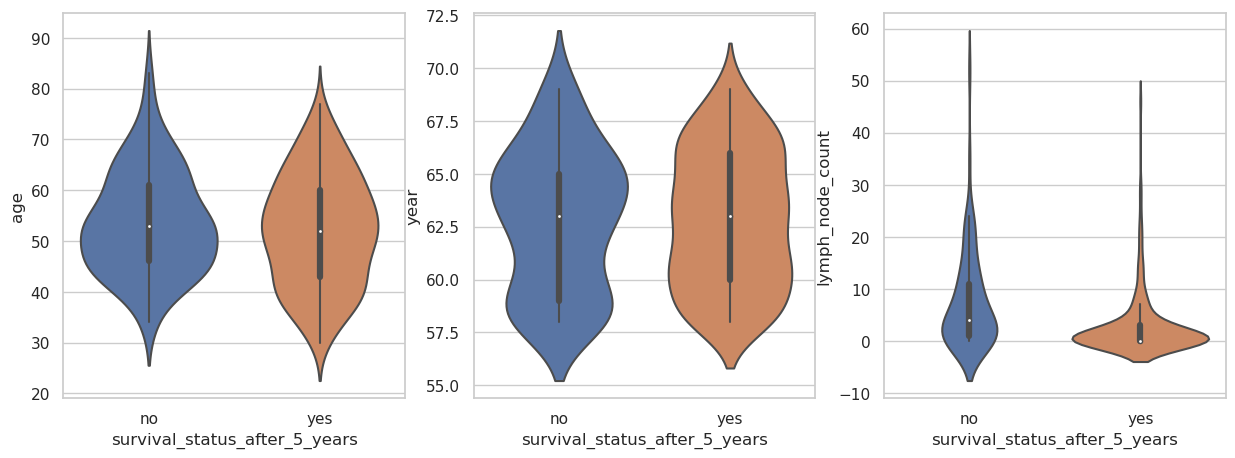

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(rda.columns)[:-1]):
    sns.violinplot( x='survival_status_after_5_years', y=feature, data=rda, ax=axes[idx])
plt.show()

The lymph node count of the survivors were heavily densed between 0 to 5.
Patients who were treated after 1965 had a higher chance of surviving than the rest of the demographic. Patients who were treated before 1960 have a lower chance of survival.